In [3]:
import os
import urllib, cStringIO

import matplotlib
from matplotlib import pylab, mlab, pyplot
%matplotlib inline
from IPython.core.pylabtools import figsize, getfigs
plt = pyplot
import seaborn as sns
sns.set_context('poster')
sns.set_style('white')

import numpy as np
from __future__ import division
import scipy.stats as stats
import tabular as tb
import pandas as pd
import json
import re

from PIL import Image
import base64

import helpers as helpers

In [22]:
# directory & file hierarchy
analysis_dir = '/Users/judithfan/reference_games/analysis/3dObjects/sketchpad_basic'
data_dir = '/Users/judithfan/reference_games/data/3dObjects/sketchpad_basic'
exp_dir = '/Users/judithfan/reference_games/experiments/3dObjects/sketchpad_basic'

clickedObj_dir = os.path.join(data_dir,'clickedObj')
stroke_dir = os.path.join(data_dir,'stroke')

# get data files
click_files = [i for i in os.listdir(clickedObj_dir) if i[-3:]=='csv']
stroke_files = [i for i in os.listdir(stroke_dir) if i[-3:]=='csv']

click_files = [i for i in click_files if i != 'placeholder.csv']
stroke_files = [i for i in stroke_files if i != 'placeholder.csv']

print 'Total games, even if incomplete: ' +  str(len(click_files))

# filter for COMPLETE games
valid_click_files = []
for x in click_files:
    X = pd.read_csv(os.path.join(clickedObj_dir,x))    
    try:
        if len(X)==32:
            valid_click_files.append(x)
    except:
        print len(X)
        pass
print 'Total complete games: ' + str(len(valid_click_files))

# click_files = valid_click_files
# stroke_files = valid_click_files

matches = [i for i in valid_click_files if i in stroke_files]
click_files = matches
stroke_files = matches
print 'Number of csvs that are in both clickedObj and stroke directories: ' + str(len(matches)) 

Total games, even if incomplete: 129
Total complete games: 104
Number of csvs that are in both clickedObj and stroke directories: 20


129

In [24]:
Y = tb.tabarray(SVfile =os.path.join(stroke_dir,stroke_files[0]))

Inferring delimiter to be '\t'
Setting metadata attribute from dialect delimiter to equal specified value: '\t'
Inferring names from the last header line (line 1 ).


In [25]:
def get_canonical(category):    
    stimFile = os.path.join(exp_dir,'stimList_subord.js')
    with open(stimFile) as f:
        stimList = json.load(f)    
    allviews = [i['filename'] for i in stimList if i['basic']==category]
    canonical = [a for a in allviews if a[-8:]=='0035.png']    
    return canonical

def get_actual_pose(subordinate,pose):
    stimFile = os.path.join(exp_dir,'stimList_subord.js')
    with open(stimFile) as f:
        stimList = json.load(f)
    inpose = [i['filename'] for i in stimList if (i['subordinate']==subordinate) and (i['pose']==pose)]
    return inpose
    
def get_subord_names(category):
    full_names = get_canonical(category)    
    return [c.split('_')[2] for c in full_names]

def get_basic_names(subordinate):
    stimFile = os.path.join(exp_dir,'stimList_subord.js')
    with open(stimFile) as f:
        stimList = json.load(f)   
    allviews = [i['filename'] for i in stimList if i['subordinate']==subordinate]
    canonical = [a for a in allviews if a[-8:]=='0035.png']      
    return canonical[0].split('_')[0]

def build_url_from_category(category):
    full_names = get_canonical(category)
    url_prefix = 'https://s3.amazonaws.com/sketchloop-images-subord/'
    urls = []
    for f in full_names:
        urls.append(url_prefix + f)
    return urls

def build_url_from_filenames(filenames):
    url_prefix = 'https://s3.amazonaws.com/sketchloop-images-subord/'
    urls = []
    for f in filenames:
        urls.append(url_prefix + f)
    return urls

def plot_from_url(URL):
    file = cStringIO.StringIO(urllib.urlopen(URL).read())
    img = Image.open(file)    

def plot_gallery(category):
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec

    plt.figure(figsize = (8,8))
    gs1 = gridspec.GridSpec(8, 8)
    gs1.update(wspace=0.025, hspace=0.05)

    url_prefix = 'https://s3.amazonaws.com/sketchloop-images-subord/'
    for (i,c) in enumerate(category):
        URL = url_prefix + c
        file = cStringIO.StringIO(urllib.urlopen(URL).read())
        img = Image.open(file)
        p = plt.subplot(3,3,i+1)
        plt.imshow(img)
        p.get_xaxis().set_ticklabels([])
        p.get_yaxis().set_ticklabels([])
        p.get_xaxis().set_ticks([])
        p.get_yaxis().set_ticks([])
        p.set_aspect('equal')
        subord = c.split('_')[2]
        plt.title(subord)
    plt.tight_layout()
    

In [26]:
## globals
stimFile = os.path.join(exp_dir,'stimList_subord.js')
with open(stimFile) as f:
    stimList = json.load(f)

canonical_birds = get_canonical('birds')
canonical_cars = get_canonical('cars')
canonical_chairs = get_canonical('chairs')
canonical_dogs = get_canonical('dogs')

bird_urls = build_url_from_category('birds')
bird_subords = get_subord_names('birds')
bird_dict = dict(zip(bird_subords,bird_urls))

car_urls = build_url_from_category('cars')
car_subords = get_subord_names('cars')
car_dict = dict(zip(car_subords,car_urls))

chair_urls = build_url_from_category('chairs')
chair_subords = get_subord_names('chairs')
chair_dict = dict(zip(chair_subords,chair_urls))

dog_urls = build_url_from_category('dogs')
dog_subords = get_subord_names('dogs')
dog_dict = dict(zip(dog_subords,dog_urls))

full_dict = dict(bird_dict,**car_dict)
full_dict.update(chair_dict)
full_dict.update(dog_dict)

In [27]:
# get single trial on demand
def print_this_trial(trialNum):
    t = X[trialNum]
    imgData = t['png']
    filestr = base64.b64decode(imgData)
    fname = 'sketch.png'
    with open(fname, "wb") as fh:
        fh.write(imgData.decode('base64'))
    textsize = 16

    # first plot the target
    im = Image.open(fname)
    fig = plt.figure(figsize=(8,4))
    p = plt.subplot(2,4,1)
    plt.imshow(im)
    sns.set_style('white')
    k = p.get_xaxis().set_ticklabels([])
    k = p.get_yaxis().set_ticklabels([])
    k = p.get_xaxis().set_ticks([])
    k = p.get_yaxis().set_ticks([])
    targetname = t['intendedTarget']
    distractors = [t['object2Name'],t['object3Name'],t['object4Name']]
    full_list = [t['intendedTarget'],t['object2Name'],t['object3Name'],t['object4Name']] 
    outcome = t['outcome']
    response = t['clickedObject']
    plt.title(targetname,fontsize=textsize)

    print 'Viewer clicked the: ' + response
    if outcome==1:
        print '(correct)'
    elif outcome==0:
        print '(incorrect)'

    # fig = plt.figure(figsize=(8,3))
    for (i,d) in enumerate(full_list):        
        if hasattr(t, 'pose'):
            pose = t['pose']
            URL = build_url_from_filenames(get_actual_pose(d,pose))
        else:
            URL = full_dict[d]               
        file = cStringIO.StringIO(urllib.urlopen(URL).read())
        img = Image.open(file)
        p = plt.subplot(2,4,i+5)
        plt.imshow(img)
        p.get_xaxis().set_ticklabels([])
        p.get_yaxis().set_ticklabels([])
        p.get_xaxis().set_ticks([])
        p.get_yaxis().set_ticks([])
        p.set_aspect('equal')   
        plt.title(d)

In [28]:
## print out sketches with target & distractors from this game
import traceback
backup_path_images = '/Users/judithfan/Dropbox/stimuli_repository/subordinate_allrotations_6_minified'

run_this = 0
if run_this:
    all_games = click_files
    for a in all_games:
#         print a
        # load in single subject clickedObj file
        X = tb.tabarray(SVfile=os.path.join(clickedObj_dir,a),delimiter='\t', namesinheader=True)
        print 'game: ' + X[0]['gameid']
        # print out sketches from all trials from this game
        for t in X: 
            imgData = t['png']
            filestr = base64.b64decode(imgData)
            fname = 'sketch.png'
            with open(fname, "wb") as fh:
                fh.write(imgData.decode('base64'))
            textsize = 16
            # first plot the target
            im = Image.open(fname)
            fig = plt.figure(figsize=(8,4))
            p = plt.subplot(2,4,1)
            plt.imshow(im)
            sns.set_style('white')
            k = p.get_xaxis().set_ticklabels([])
            k = p.get_yaxis().set_ticklabels([])
            k = p.get_xaxis().set_ticks([])
            k = p.get_yaxis().set_ticks([])
            targetname = t['intendedTarget']
            distractors = [t['object2Name'],t['object3Name'],t['object4Name']]
            full_list = [t['intendedTarget'],t['object2Name'],t['object3Name'],t['object4Name']] 
            outcome = t['outcome']
            response = t['clickedObject']
            if outcome == 1:
                sides = ['bottom','top','right','left']
                for s in sides:
                    p.spines[s].set_color((0.4,0.8,0.4))
                    p.spines[s].set_linewidth(4)                               
            else:
                sides = ['bottom','top','right','left']
                for s in sides:
                    p.spines[s].set_color((0.9,0.2,0.2))
                    p.spines[s].set_linewidth(4)                      
            plt.title(targetname,fontsize=textsize)
            plt.ylabel('v:' + response,fontsize=textsize-2)

            # fig = plt.figure(figsize=(8,3))
            for (i,d) in enumerate(full_list):
                if os.path.exists(backup_path_images):
                    if hasattr(t, 'pose'):
                        fn = os.path.join(backup_path_images,get_actual_pose(d,pose)[0])
                    else:
                        fn = os.path.join(backup_path_images,get_actual_pose(d,35)[0])
                else:
                    if hasattr(t, 'pose'):
                        pose = t['pose']
                        URL = build_url_from_filenames(get_actual_pose(d,pose)[0])
                    else:
                        URL = full_dict[d]
                    fn = cStringIO.StringIO(urllib.urlopen(URL).read())
                img = Image.open(fn)
                p = plt.subplot(2,4,i+5)
                plt.imshow(img)
                p.get_xaxis().set_ticklabels([])
                p.get_yaxis().set_ticklabels([])
                p.get_xaxis().set_ticks([])
                p.get_yaxis().set_ticks([])
                p.set_aspect('equal')   
                plt.title(d)

            sketch_dir = os.path.join(analysis_dir,'sketches')
            filepath = os.path.join(sketch_dir,'gameID_' + t['gameid'] + '_trial_' + str(t['trialNum']))
            helpers.save(filepath, ext='png', close=True, verbose=False)

### Analyze stroke data

In [29]:
##### analysis next steps:
## stroke number, drawing duration, accuracy
Y = tb.tabarray(SVfile=os.path.join(stroke_dir,stroke_files[0]))

# get column names
print Y.metadata['names']

Inferring delimiter to be '\t'
Setting metadata attribute from dialect delimiter to equal specified value: '\t'
Inferring names from the last header line (line 1 ).
['gameid', 'time', 'trialNum', 'strokeNum', 'targetName', 'svg']


In [30]:
string = Y[10]['svg']
import re
num_curves = len([m.start() for m in re.finditer('c', string)])
print num_curves

2


In [36]:
## analyze data and form game metadata array
all_games = click_files

TrialNum = []
GameID = []
Condition = []
Target = []
Distractor1 = []
Distractor2 = []
Distractor3 = []
Outcome = []
Response = []
numStrokes = []
drawDuration = [] # in seconds
svgStringLength = [] # sum of svg string for whole sketch
svgStringLengthPerStroke = [] # svg string length per stroke
numCurvesPerSketch = [] # number of curve segments per sketch
numCurvesPerStroke = [] # mean number of curve segments per stroke
svgStringStd = [] # std of svg string length across strokes for this sketch
Outcome = []
Png = []
Svg = []

for a in all_games:
    # load in single subject clickedObj file
    X = tb.tabarray(SVfile=os.path.join(clickedObj_dir,a),delimiter='\t', namesinheader=True)
    Y = tb.tabarray(SVfile=os.path.join(stroke_dir,a),delimiter='\t', namesinheader=True)
    # print out sketches from all trials from this game
    for t in X: 
        targetname = t['intendedTarget']
        distractors = [t['object2Name'],t['object3Name'],t['object4Name']]
        full_list = [t['intendedTarget'],t['object2Name'],t['object3Name'],t['object4Name']] 
        ns = sum(Y['trialNum']==t['trialNum'])
        numStrokes.append(ns)
        drawDuration.append((Y[Y['trialNum']==t['trialNum']]['time'][-1] - Y[Y['trialNum']==t['trialNum']]['time'][0])/1000) # in seconds
        svgs = Y[Y['trialNum']==t['trialNum']]['svg']
        ls = [len(s) for s in svgs]
        svgStringLength.append(reduce(lambda x, y: x + y, ls))
        num_curves = [len([m.start() for m in re.finditer('c', s)]) for s in svgs]
        numCurvesPerSketch.append(reduce(lambda x, y: x + y, num_curves))
        numCurvesPerStroke.append(reduce(lambda x, y: x + y, num_curves)/ns)
        svgStringLengthPerStroke.append(reduce(lambda x, y: x + y, ls)/ns)
        svgStringStd.append(np.std(ls))
        ## aggregate game metadata
        TrialNum.append(t['trialNum'])
        GameID.append(t['gameid'])        
        Target.append(targetname)
        Distractor1.append(distractors[0])
        Distractor2.append(distractors[1])
        Distractor3.append(distractors[2])        
        if get_basic_names(targetname)==get_basic_names(distractors[0]): # 'closer' condition
            Condition.append('closer')
        else:
            Condition.append('further') 
        Outcome.append(t['outcome'])
        Response.append(t['clickedObject'])   
        Png.append(t['png'])
        Svg.append(list(svgs))

GameID,TrialNum,Condition, Target, Distractor1, Distractor2, Distractor3, drawDuration, \
Outcome, Response, numStrokes, svgStringLength, svgStringLengthPerStroke, svgStringStd, Outcome = map(np.array, \
[GameID,TrialNum,Condition, Target, Distractor1, Distractor2, Distractor3, drawDuration, \
 Outcome, Response, numStrokes, svgStringLength, svgStringLengthPerStroke, svgStringStd, Outcome])

D = tb.tabarray(names = ['gameID','trialNum','condition', 'target', 'd1', 'd2','d3', 'drawDuration', \
                         'outcome', 'response','numStrokes', 'svgStringLength','svgStringLengthPerStroke' ,\
                         'svgStringStd', 'Outcome', 'svg'],
                columns = [GameID,TrialNum,Condition, Target, Distractor1, Distractor2, Distractor3, drawDuration, \
                           Outcome, Response, numStrokes, svgStringLength, svgStringLengthPerStroke, svgStringStd, \
                           Outcome, Svg])

Setting dialect attribute delimiter to equal specified value: '\t'
Inferring names from the last header line (line 1 ).
Setting dialect attribute delimiter to equal specified value: '\t'
Inferring names from the last header line (line 1 ).
Setting dialect attribute delimiter to equal specified value: '\t'
Inferring names from the last header line (line 1 ).
Setting dialect attribute delimiter to equal specified value: '\t'
Inferring names from the last header line (line 1 ).
Setting dialect attribute delimiter to equal specified value: '\t'
Inferring names from the last header line (line 1 ).
Setting dialect attribute delimiter to equal specified value: '\t'
Inferring names from the last header line (line 1 ).
Setting dialect attribute delimiter to equal specified value: '\t'
Inferring names from the last header line (line 1 ).
Setting dialect attribute delimiter to equal specified value: '\t'
Inferring names from the last header line (line 1 ).
Setting dialect attribute delimiter to e

In [37]:
## save out group_data dataframe
## add fake pose column
Pose = [np.nan]*len(GameID) ## assign to be -1 because unknown
iteration = ['pilot0']*len(GameID)
df = pd.DataFrame([GameID,TrialNum,Condition, Target, drawDuration, \
                   Outcome, Response, numStrokes, svgStringLength, svgStringLengthPerStroke, \
                   svgStringStd, Distractor1, Distractor2, Distractor3, Pose, iteration, Svg])
df = df.transpose()
df.columns = ['gameID','trialNum','condition', 'target', 'drawDuration','outcome', 'response', \
             'numStrokes', 'svgStringLength', 'svgStringLengthPerStroke', 'svgStringStd', \
            'Distractor1', 'Distractor2', 'Distractor3', 'pose', 'iteration', 'svg']
## add png column
df = df.assign(png=pd.Series(Png).values)

## save out dataframe
df.to_csv(os.path.join(analysis_dir,'sketchpad_basic_pilot0_group_data.csv'))

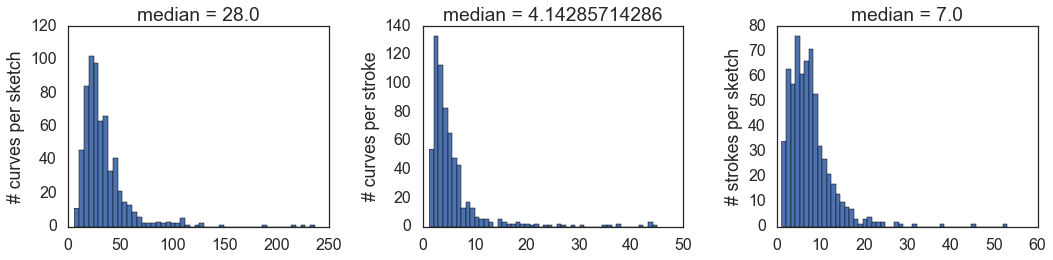

In [113]:
fig = plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
h = plt.hist(numCurvesPerSketch,50)
plt.title('median = ' + str(np.median(numCurvesPerSketch)))
plt.ylabel('# curves per sketch')
plt.subplot(1,3,2)
h = plt.hist(numCurvesPerStroke,50)
plt.title('median = ' + str(np.median(numCurvesPerStroke)))
plt.ylabel('# curves per stroke')
plt.subplot(1,3,3)
h = plt.hist(numStrokes,50)
plt.title('median = ' + str(np.median(numStrokes)))
plt.ylabel('# strokes per sketch')
plt.tight_layout()

In [75]:
# get summary statistics
all_games = np.unique(D['gameID'])
further_strokes = []
closer_strokes = []
further_svgLength = []
closer_svgLength = []
further_svgStd = []
closer_svgStd = []
further_svgLengthPS = []
closer_svgLengthPS = []
further_drawDuration = []
closer_drawDuration = []
further_accuracy = []
closer_accuracy = []
for game in all_games:    
    further_strokes.append(D[(D['gameID']== game) & (D['condition'] == 'further')]['numStrokes'].mean())
    closer_strokes.append(D[(D['gameID']== game) & (D['condition'] == 'closer')]['numStrokes'].mean())
    further_svgLength.append(D[(D['gameID']== game) & (D['condition'] == 'further')]['svgStringLength'].mean())
    closer_svgLength.append(D[(D['gameID']== game) & (D['condition'] == 'closer')]['svgStringLength'].mean())
    further_svgStd.append(D[(D['gameID']== game) & (D['condition'] == 'further')]['svgStringStd'].mean())
    closer_svgStd.append(D[(D['gameID']== game) & (D['condition'] == 'closer')]['svgStringStd'].mean())    
    further_svgLengthPS.append(D[(D['gameID']== game) & (D['condition'] == 'further')]['svgStringLengthPerStroke'].mean())
    closer_svgLengthPS.append(D[(D['gameID']== game) & (D['condition'] == 'closer')]['svgStringLengthPerStroke'].mean())
    further_drawDuration.append(D[(D['gameID']== game) & (D['condition'] == 'further')]['drawDuration'].mean())
    closer_drawDuration.append(D[(D['gameID']== game) & (D['condition'] == 'closer')]['drawDuration'].mean())
    further_accuracy.append(D[(D['gameID']== game) & (D['condition'] == 'further')]['outcome'].mean())
    closer_accuracy.append(D[(D['gameID']== game) & (D['condition'] == 'closer')]['outcome'].mean())
    
further_strokes, closer_strokes, further_svgLength, closer_svgLength, \
further_svgStd, closer_svgStd, further_svgLengthPS, closer_svgLengthPS, \
further_drawDuration, closer_drawDuration, further_accuracy, closer_accuracy = map(np.array, \
[further_strokes, closer_strokes, further_svgLength, closer_svgLength,\
 further_svgStd, closer_svgStd, further_svgLengthPS, closer_svgLengthPS, \
further_drawDuration, closer_drawDuration, further_accuracy, closer_accuracy])

In [77]:
print further_strokes.mean()
print closer_strokes.mean()
print further_svgLength.mean()
print closer_svgLength.mean()
print further_svgStd.mean()
print closer_svgStd.mean()
print further_svgLengthPS.mean()
print closer_svgLengthPS.mean()
print further_drawDuration.mean()
print closer_drawDuration.mean()
print further_accuracy.mean()
print closer_accuracy.mean()

6.265625
9.346875
996.496875
1592.13125
133.942831699
190.838809878
224.914709192
210.212406287
12.645740625
26.219271875
0.971875
0.853125


Saving figure to 'plots/svg_summary_scatter.pdf'... Done


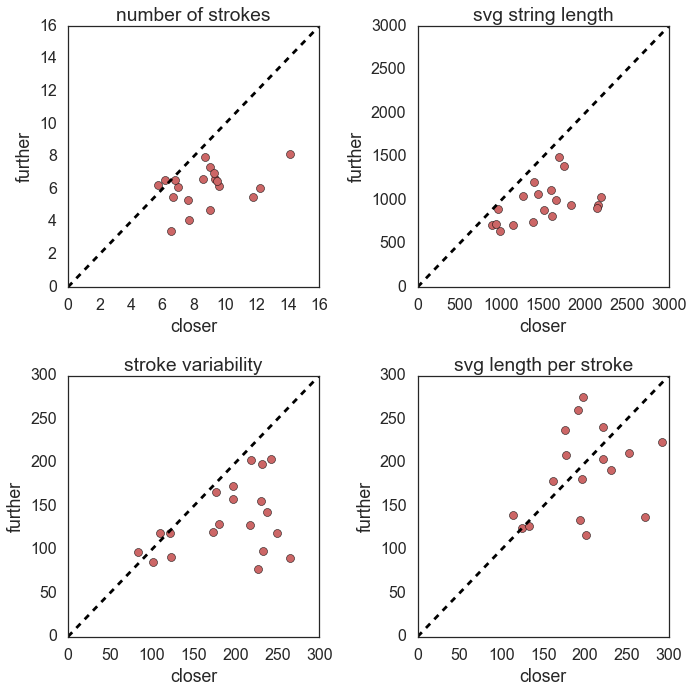

In [78]:
fig = plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
lb = 0
ub = 16
plt.plot([lb,ub],[lb,ub],'k--')
plt.scatter(closer_strokes,further_strokes,64,(0.8,0.4,0.4))
plt.xlim([lb,ub])
plt.ylim([lb,ub])
plt.title('number of strokes')
plt.xlabel('closer')
plt.ylabel('further')
plt.subplot(2,2,2)
lb = 0
ub = 3000
plt.plot([lb,ub],[lb,ub],'k--')
plt.scatter(closer_svgLength,further_svgLength,64,(0.8,0.4,0.4))
plt.xlim([lb,ub])
plt.ylim([lb,ub])
plt.tight_layout()
plt.title('svg string length')
plt.xlabel('closer')
plt.ylabel('further')
plt.subplot(2,2,3)
lb = 0
ub = 300
plt.plot([lb,ub],[lb,ub],'k--')
plt.scatter(closer_svgStd,further_svgStd,64,(0.8,0.4,0.4))
plt.xlim([lb,ub])
plt.ylim([lb,ub])
plt.title('stroke variability')
plt.xlabel('closer')
plt.ylabel('further')
plt.subplot(2,2,4)
lb = 0
ub = 300
plt.plot([lb,ub],[lb,ub],'k--')
plt.scatter(closer_svgLengthPS,further_svgLengthPS,64,(0.8,0.4,0.4))
plt.xlim([lb,ub])
plt.ylim([lb,ub])
plt.tight_layout()
plt.title('svg length per stroke')
plt.xlabel('closer')
plt.ylabel('further')
save_out = 1
if save_out:
    helpers.save('plots/svg_summary_scatter', ext='pdf', close=False, verbose=True)

Saving figure to 'plots/performance_summary_scatter.pdf'... Done


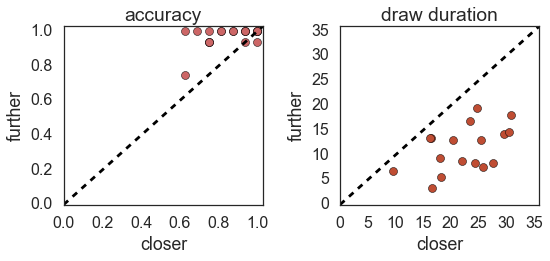

In [79]:
fig = plt.figure(figsize=(8,4))
lb = 0
ub = 1.03
plt.subplot(1,2,1)
plt.plot([lb,ub],[lb,ub],'k--')
plt.scatter(closer_accuracy,further_accuracy,64,(0.8,0.4,0.4))
plt.xlim([lb,ub])
plt.ylim([lb,ub])
plt.title('accuracy')
plt.xlabel('closer')
plt.ylabel('further')
plt.subplot(1,2,2)
lb = 0
ub = 36
plt.plot([lb,ub],[lb,ub],'k--')
plt.scatter(closer_drawDuration,further_drawDuration,64,(0.75,0.3,0.2))
plt.xlim([lb,ub])
plt.ylim([lb,ub])
plt.title('draw duration')
plt.xlabel('closer')
plt.ylabel('further')
plt.tight_layout()
save_out = 1
if save_out:
    helpers.save('plots/performance_summary_scatter', ext='pdf', close=False, verbose=True)

Participants more affected by the closer vs. further manipulation tend to produce sketches with more strokes, which are also more complex
0.719819531912 0.000345875483196


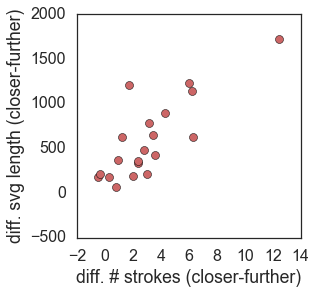

In [80]:
fig = plt.figure(figsize=(4,4))
plt.scatter(closer_strokes-further_strokes,closer_svgLength-further_svgLength,64,(0.8,0.4,0.4))
plt.xlabel('diff. # strokes (closer-further)')
plt.ylabel('diff. svg length (closer-further)')
r,p = stats.spearmanr(closer_strokes-further_strokes,closer_svgLength-further_svgLength)
print 'Participants more affected by the closer vs. further manipulation tend to produce sketches with more strokes, which are also more complex'
print r,p

In [81]:
import numpy.random as npr
import pylab
def bootstrap(data, num_samples, statistic, alpha):
    """Returns bootstrap estimate of 100.0*(1-alpha) CI for statistic."""
    n = len(data)
    idx = npr.randint(0, n, (num_samples, n))
    samples = data[idx]
    stat = np.sort(statistic(samples, 1))
    return (stat[int((alpha/2.0)*num_samples)],
            stat[int((1-alpha/2.0)*num_samples)])


In [82]:
numStrokes = pd.DataFrame(np.vstack((closer_strokes,further_strokes)).transpose(), \
                 columns = ['closer','further'])
svgLength = pd.DataFrame(np.vstack((closer_svgLength,further_svgLength)).transpose(), \
                 columns = ['closer','further'])
strokeVariability = pd.DataFrame(np.vstack((closer_svgStd,further_svgStd)).transpose(), \
                 columns = ['closer','further'])
svgComplexity = pd.DataFrame(np.vstack((closer_svgLengthPS,further_svgLengthPS)).transpose(), \
                 columns = ['closer','further'])
accuracy = pd.DataFrame(np.vstack((closer_accuracy,further_accuracy)).transpose(), \
                 columns = ['closer','further'])
drawDuration = pd.DataFrame(np.vstack((closer_drawDuration,further_drawDuration)).transpose(), \
                 columns = ['closer','further'])


Saving figure to 'plots/svg_summary_bars.pdf'... Done


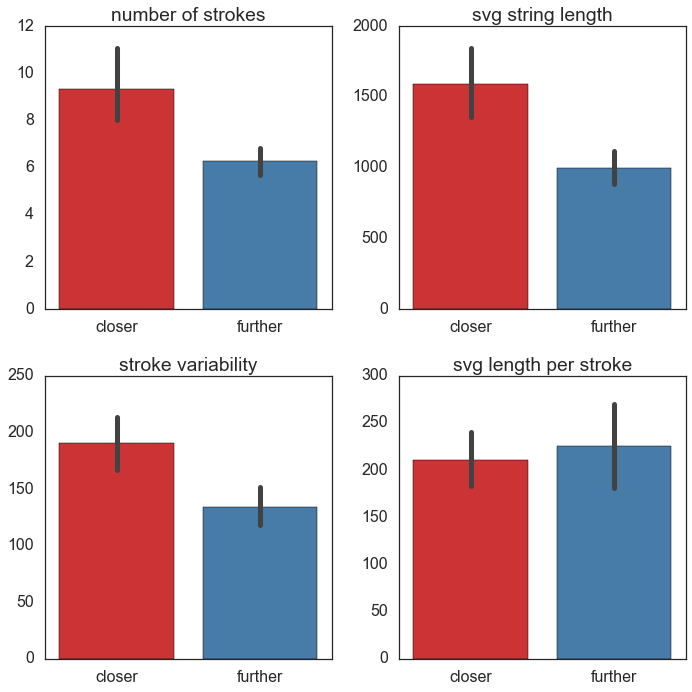

In [83]:
fig = plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.barplot(data=numStrokes,ci=95,palette="Set1")
plt.title('number of strokes')
plt.subplot(2,2,2)
sns.barplot(data=svgLength,ci=95,palette="Set1")
plt.tight_layout()
plt.title('svg string length')
plt.subplot(2,2,3)
sns.barplot(data=strokeVariability,ci=95,palette="Set1")
plt.tight_layout()
plt.title('stroke variability')
plt.subplot(2,2,4)
sns.barplot(data=svgComplexity,ci=95,palette="Set1")
plt.tight_layout()
plt.title('svg length per stroke')

save_out = 1
if save_out:
    helpers.save('plots/svg_summary_bars', ext='pdf', close=False, verbose=True)

Saving figure to 'plots/performance_summary_bars.pdf'... Done


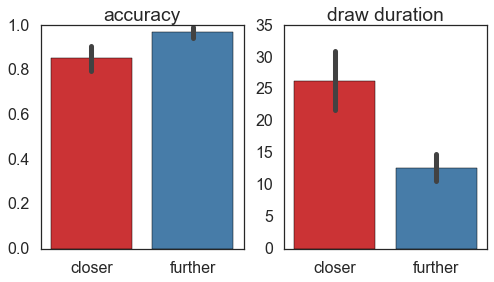

In [84]:
fig = plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.barplot(data=accuracy,ci=95,palette="Set1")
plt.title('accuracy')
plt.subplot(1,2,2)
sns.barplot(data=drawDuration,ci=95,palette="Set1")
plt.title('draw duration')
save_out = 1
if save_out:
    helpers.save('plots/performance_summary_bars', ext='pdf', close=False, verbose=True)

## 3D Object Gallery

Saving figure to 'plots/bird_gallery.pdf'... Done


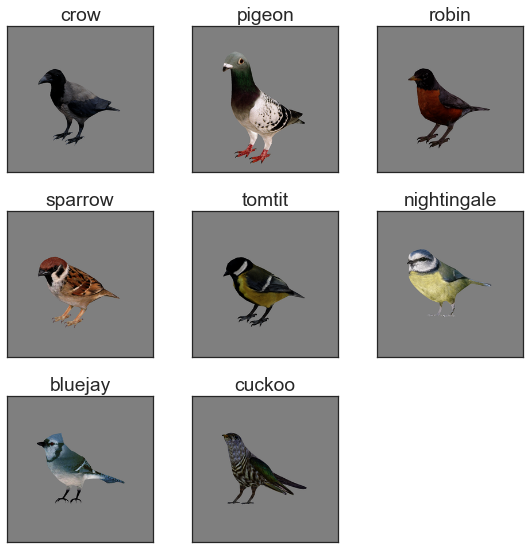

In [620]:
plot_gallery(canonical_birds)
save_out = 1
if save_out:
    helpers.save('plots/bird_gallery', ext='pdf', close=False, verbose=True)

Saving figure to 'plots/car_gallery.pdf'... Done


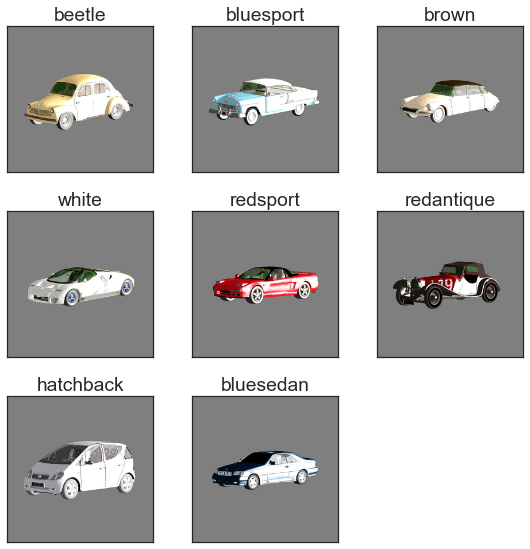

In [621]:
plot_gallery(canonical_cars)
save_out = 1
if save_out:    
    helpers.save('plots/car_gallery', ext='pdf', close=False, verbose=True)

Saving figure to 'plots/dog_gallery.pdf'... Done


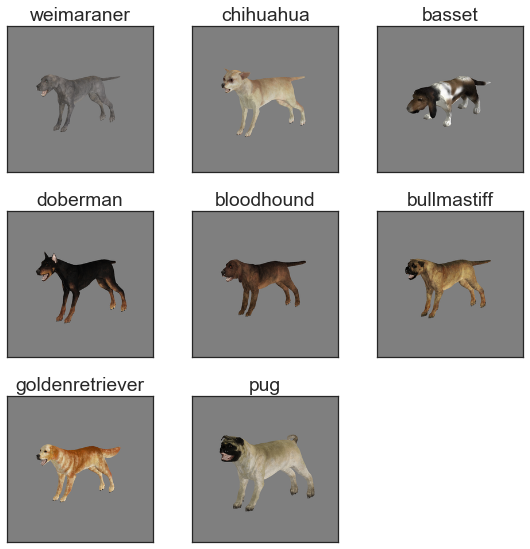

In [622]:
plot_gallery(canonical_dogs)
save_out = 1
if save_out:
    helpers.save('plots/dog_gallery', ext='pdf', close=False, verbose=True)

Saving figure to 'plots/chair_gallery.pdf'... Done


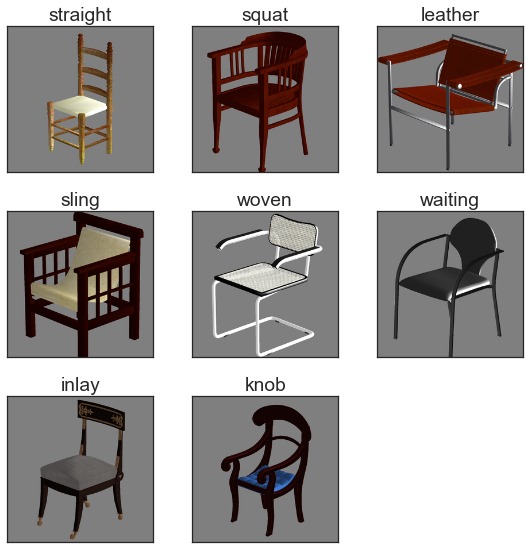

In [623]:
plot_gallery(canonical_chairs)
save_out = 1
if save_out:
    helpers.save('plots/chair_gallery', ext='pdf', close=False, verbose=True)

In [94]:
Y[13]['svg']

'M51,193.6c12.15394,0 97.67087,-5.55275 103,-2c4.79142,3.19428 16.65324,4 24,4'

###  Insert existing data from first sketchpad ('basic') experiment to database

In [27]:
# data from mturk sent at end of the HIT
production_results_dir = '/Users/judithfan/mturkrecords/sketchpad_basic/pilot0/production-results'
recorded_hits = os.listdir(production_results_dir)

gameid = []
wID = []
aID = []
role = []
for rh in recorded_hits:
    path = os.path.join(production_results_dir,rh)
    x = pd.read_json(path,orient='values') 
    aID.append(str(x.AssignmentId['id']))
    gameid.append(str(x.answers['id']))
    wID.append(str(x.WorkerId['id']))
    role.append(str(x.answers['subject_information']['role']))
data = zip(gameid,wID,aID,role)
columns = ['gameid','wID','aID','role']
D = pd.DataFrame(data=data,columns=columns)

In [29]:
import pandas as pd
import json
import pymongo as pm


# set vars 
auth = pd.read_csv('auth.txt', header = None) # this auth.txt file contains the password for the sketchloop user
pswd = auth.values[0][0]
user = 'sketchloop'
host = 'rxdhawkins.me' ## cocolab ip address

# mongo information
conn = pm.MongoClient('mongodb://sketchloop:' + pswd + '@127.0.0.1')
db = conn['3dObjects']
coll = db['sketchpad_basic']


In [65]:
actually_upload = 1

# insert clickedObj data
for a in all_games:
    # load in single subject clickedObj file
    X = pd.read_csv(os.path.join(clickedObj_dir,a),delimiter='\t')
    # add column for data type
    dtype = pd.DataFrame({'eventType': ['clickedObj']*len(X)})    
    X = X.join(dtype)
    # add column for iteration name
    iterationName = pd.DataFrame({'iterationName': ['pilot0']*len(X)})
    X = X.join(iterationName)    
    # add column for worker ID    
    gID = X.gameid[0][:6]
    try:
        wID = D[(D.gameid==gID) & (D.role=='viewer')]['wID'].values[0] ## viewer role because clickedObj file
    except:
        print 'Could not find this gameID in production-results dir: ' + str(X.gameid[0][:6])
        wID = 'Unknown'
        pass    
    wID_list = pd.DataFrame({'workerId': [wID]*len(X)})    
    X = X.join(wID_list)    
    # convert to JSON dictionary type
    X2 = X.to_dict(orient='records')
    # write to json file
    js_file = a.split('.')[0]+'.js'
    path_to_js_file = os.path.join(clickedObj_dir,js_file)
    with open(path_to_js_file, 'w') as fp:
        json.dump(X2, fp)
    # read in JSON file as J
    J = json.loads(open(path_to_js_file,mode='ru').read())
    assert len(J)==len(X)
    # actually insert data into database now
    if actually_upload:
        for (i,j) in enumerate(J):
    #         if i%10==0:
    #             print ('%d of %d' % (i,len(J)))            
            coll.insert(j, w=1) 
        print 'successfully uploaded: ' + str(wID[:5])

In [67]:
actually_upload = 1

# insert stroke data
for a in all_games:
    # load in single subject clickedObj file
    X = pd.read_csv(os.path.join(stroke_dir,a),delimiter='\t')
    # add column for data type
    dtype = pd.DataFrame({'eventType': ['stroke']*len(X)})
    X = X.join(dtype)
    # add column for iteration name
    iterationName = pd.DataFrame({'iterationName': ['pilot0']*len(X)})
    X = X.join(iterationName)       
    # add column for worker ID    
    gID = X.gameid[0][:6]
    try:
        wID = D[(D.gameid==gID) & (D.role=='sketcher')]['wID'].values[0] ## viewer role because clickedObj file
    except:
        print 'Could not find this gameID in production-results dir: ' + str(X.gameid[0][:6])
        wID = 'Unknown'
        pass    
    wID_list = pd.DataFrame({'workerId': [wID]*len(X)})    
    X = X.join(wID_list)              
    # convert to JSON dictionary type
    X2 = X.to_dict(orient='records')
    # write to json file
    js_file = a.split('.')[0]+'.js'
    path_to_js_file = os.path.join(stroke_dir,js_file)
    with open(path_to_js_file, 'w') as fp:
        json.dump(X2, fp)
    # read in JSON file as J
    J = json.loads(open(path_to_js_file,mode='ru').read())
    assert len(J)==len(X)   
    # actually insert data into database now
    if actually_upload:
        for (i,j) in enumerate(J):        
    #         if i%10==0:
    #             print ('%d of %d' % (i,len(J)))
            coll.insert(j, w=1)   
        print 'successfully uploaded: ' + str(wID[:5])

Could not find this gameID in production-results dir: 6802-2
successfully uploaded: Unkno
Could not find this gameID in production-results dir: 6414-0
successfully uploaded: Unkno
Could not find this gameID in production-results dir: 2237-2
successfully uploaded: Unkno
Could not find this gameID in production-results dir: 4747-d
successfully uploaded: Unkno
Could not find this gameID in production-results dir: 8766-c
successfully uploaded: Unkno
Could not find this gameID in production-results dir: 1959-9
successfully uploaded: Unkno
Could not find this gameID in production-results dir: 6800-c
successfully uploaded: Unkno
Could not find this gameID in production-results dir: 0814-0
successfully uploaded: Unkno
Could not find this gameID in production-results dir: 1111-5
successfully uploaded: Unkno
Could not find this gameID in production-results dir: 4065-8
successfully uploaded: Unkno
Could not find this gameID in production-results dir: 8547-3
successfully uploaded: Unkno
Could not 

/Users/judithfan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:38: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
